# Joining Hurricane and Housing Dataframes 

In [1]:
#Importing libraries needed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Obtaining Data 

In [2]:
#opening dataframes 
bottom =  pd.read_csv(r'data\bottom_housing.csv')
middle = pd.read_csv(r'data\middle_housing.csv')
top = pd.read_csv(r'data\top_housing.csv')
hurricane = pd.read_csv(r'data\hurricane_cleaned.csv')

In [3]:
#checking it out
bottom.head()

,City,HurricaneName,SizeRank,before,after,percent,increase
0,Jacksonville,charley,12,46528.30349,52803.32790,13.486467,0
1,Orlando,charley,16,75863.27537,88560.22345,16.736620,0
2,Miami,charley,20,86752.55847,106338.70750,22.577028,0
3,Tampa,charley,50,51585.41060,61309.89329,18.851227,0
4,Saint Petersburg,charley,84,47796.13229,57880.05754,21.097785,0


In [4]:
#checking it out
middle.head()

,City,HurricaneName,SizeRank,before,after,percent,increase
0,Jacksonville,charley,12,120287.1799,136338.2043,13.343919,0
1,Orlando,charley,16,153628.1167,178133.7990,15.951300,0
2,Miami,charley,20,196585.3564,242294.9810,23.251795,1
3,Tampa,charley,50,134130.4031,158405.6253,18.098225,0
4,Saint Petersburg,charley,84,112809.7002,134746.5950,19.445930,0


In [5]:
#checking it out
top.head()

,City,HurricaneName,SizeRank,before,after,percent,increase
0,Jacksonville,charley,12,219711.2386,249137.7656,13.393273,0
1,Orlando,charley,16,268593.0990,311622.3096,16.020222,0
2,Miami,charley,20,438933.0461,531656.5319,21.124745,0
3,Tampa,charley,50,314461.3881,368173.9723,17.080820,0
4,Saint Petersburg,charley,84,245925.9512,292718.6866,19.027165,0


In [6]:
#checking it out
hurricane

,DATE,AWND,WSF2,HurricaneName,City
0,8/14/2004,5.820000,13.00000,charley,Apalachicola
1,8/13/2004,7.380000,13.00000,charley,Brooksville
2,8/14/2004,4.700000,21.90000,charley,Brooksville
3,8/13/2004,9.620000,25.10000,charley,Clearwater
4,8/14/2004,7.380000,25.10000,charley,Clearwater
...,...,...,...,...,...
534,9/29/2022,29.527080,51.44870,ian,Tallahassee
535,9/28/2022,39.526023,82.54161,ian,Tampa
536,9/29/2022,57.040950,107.59489,ian,Vero Beach
537,9/28/2022,53.551386,85.00220,ian,West Palm Beach


## Data Scrubbing

In [7]:
hurricane.isna().sum()

DATE             0
AWND             0
WSF2             0
HurricaneName    0
City             0
dtype: int64

# Joining Housing Values with Hurricanes 
In order to do logistic regression on our data we need to join the datasets. We will use the join method joining the hurricane dataset into the housing dataset. 

Documentation can be found here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

In [8]:
#setting the index to city and HurricaneName so that we use .join()
hurricane.set_index(['City', 'HurricaneName'], inplace = True)

In [9]:
#function to join housing and hurricane datasets
def join(df):
    #setting the index
    df.set_index(['City', 'HurricaneName'], inplace = True)
    #joining the dataframe
    df = hurricane.join(df, how='inner')
    #reseting the index
    df.reset_index(inplace = True)
    return df

## Joining Bottom Tier Home Values with Hurricane Data

In [10]:
#applying function
bottom_hurricane = join(bottom)
#looking at results
bottom_hurricane

,City,HurricaneName,DATE,AWND,WSF2,SizeRank,before,after,percent,increase
0,Apalachicola,charley,8/14/2004,5.8200,13.00000,12877,33025.67901,41196.08834,24.739565,1
1,Apalachicola,dennis,7/10/2005,19.4600,30.00000,12877,40369.46137,50891.84431,26.065205,0
2,Apalachicola,dennis,7/11/2005,17.0000,32.00000,12877,40369.46137,50891.84431,26.065205,0
3,Apalachicola,ian,9/28/2022,38.0273,57.93571,12877,65287.07867,76710.34737,17.496982,1
4,Apalachicola,irma,9/11/2017,20.8000,36.90000,12877,52379.75722,63594.00344,21.409504,1
...,...,...,...,...,...,...,...,...,...,...
428,Winter Haven,matthew,10/7/2016,13.4200,25.90000,395,69267.39054,80862.30360,16.739353,1
429,Winter Haven,matthew,10/8/2016,8.7200,18.10000,395,69267.39054,80862.30360,16.739353,1
430,Winter Haven,michael,10/11/2018,7.3800,16.10000,395,94132.64063,110238.51310,17.109764,1
431,Winter Haven,michael,10/10/2018,13.2000,25.10000,395,94132.64063,110238.51310,17.109764,1


## Joining Middle Tier Home Values with Hurricane Data 

In [11]:
#applying function
middle_hurricane = join(middle)
#looking at results 
middle_hurricane

,City,HurricaneName,DATE,AWND,WSF2,SizeRank,before,after,percent,increase
0,Apalachicola,charley,8/14/2004,5.8200,13.00000,12877,91915.39335,114408.1491,24.471152,1
1,Apalachicola,dennis,7/10/2005,19.4600,30.00000,12877,112287.89680,140227.0087,24.881677,0
2,Apalachicola,dennis,7/11/2005,17.0000,32.00000,12877,112287.89680,140227.0087,24.881677,0
3,Apalachicola,ian,9/28/2022,38.0273,57.93571,12877,144565.87220,161515.9275,11.724797,1
4,Apalachicola,irma,9/11/2017,20.8000,36.90000,12877,127923.42670,142053.1799,11.045477,0
...,...,...,...,...,...,...,...,...,...,...
421,West Palm Beach,matthew,10/7/2016,19.6900,31.10000,158,197641.97590,216511.5252,9.547339,0
422,West Palm Beach,matthew,10/8/2016,10.5100,17.00000,158,197641.97590,216511.5252,9.547339,0
423,West Palm Beach,michael,10/11/2018,6.9300,17.00000,158,235358.13210,250692.0721,6.515152,0
424,West Palm Beach,michael,10/10/2018,12.7500,25.10000,158,235358.13210,250692.0721,6.515152,0


## Joining Top Tier Home Values with Hurricane Data

In [12]:
#applying function
top_hurricane = join(top)
#looking at results
top_hurricane

,City,HurricaneName,DATE,AWND,WSF2,SizeRank,before,after,percent,increase
0,Apalachicola,charley,8/14/2004,5.8200,13.00000,12877,221794.3003,275297.2698,24.122788,1
1,Apalachicola,dennis,7/10/2005,19.4600,30.00000,12877,269923.5452,339439.8016,25.754054,0
2,Apalachicola,dennis,7/11/2005,17.0000,32.00000,12877,269923.5452,339439.8016,25.754054,0
3,Apalachicola,ian,9/28/2022,38.0273,57.93571,12877,279871.2479,308859.8100,10.357821,1
4,Apalachicola,irma,9/11/2017,20.8000,36.90000,12877,257605.2886,276477.8214,7.326143,0
...,...,...,...,...,...,...,...,...,...,...
430,West Palm Beach,matthew,10/7/2016,19.6900,31.10000,158,375111.3104,393070.8116,4.787779,0
431,West Palm Beach,matthew,10/8/2016,10.5100,17.00000,158,375111.3104,393070.8116,4.787779,0
432,West Palm Beach,michael,10/11/2018,6.9300,17.00000,158,414414.1815,434088.9600,4.747612,0
433,West Palm Beach,michael,10/10/2018,12.7500,25.10000,158,414414.1815,434088.9600,4.747612,0


## Creating a Dataset with Bottom, Middle, and Top Tier Homes

In [13]:
#concating the three dataframes into one 
all_hurricane = hurricane = pd.concat([bottom_hurricane, middle_hurricane, top_hurricane], ignore_index=True)
all_hurricane

,City,HurricaneName,DATE,AWND,WSF2,SizeRank,before,after,percent,increase
0,Apalachicola,charley,8/14/2004,5.8200,13.00000,12877,33025.67901,41196.08834,24.739565,1
1,Apalachicola,dennis,7/10/2005,19.4600,30.00000,12877,40369.46137,50891.84431,26.065205,0
2,Apalachicola,dennis,7/11/2005,17.0000,32.00000,12877,40369.46137,50891.84431,26.065205,0
3,Apalachicola,ian,9/28/2022,38.0273,57.93571,12877,65287.07867,76710.34737,17.496982,1
4,Apalachicola,irma,9/11/2017,20.8000,36.90000,12877,52379.75722,63594.00344,21.409504,1
...,...,...,...,...,...,...,...,...,...,...
1289,West Palm Beach,matthew,10/7/2016,19.6900,31.10000,158,375111.31040,393070.81160,4.787779,0
1290,West Palm Beach,matthew,10/8/2016,10.5100,17.00000,158,375111.31040,393070.81160,4.787779,0
1291,West Palm Beach,michael,10/11/2018,6.9300,17.00000,158,414414.18150,434088.96000,4.747612,0
1292,West Palm Beach,michael,10/10/2018,12.7500,25.10000,158,414414.18150,434088.96000,4.747612,0


## Data Exploration

In [14]:
#checking descriptive stats
bottom_hurricane.describe()

,AWND,WSF2,SizeRank,before,after,percent,increase
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,17.050417,32.820248,836.427252,95603.235456,110462.544534,16.765446,0.369515
std,13.009195,22.912817,2127.208992,33766.654876,35707.591357,7.402668,0.483232
min,4.030000,0.000000,12.000000,33025.679010,41196.088340,1.715556,0.000000
25%,9.170000,19.900000,84.000000,71026.657360,83003.431000,11.465540,0.000000
50%,13.200000,25.100000,190.000000,90687.074960,107991.152200,16.018972,0.000000
75%,19.460000,36.900000,704.000000,117150.037000,135916.268400,20.412881,1.000000
max,91.064199,194.610300,12877.000000,217713.978800,246535.290800,38.720009,1.000000


In [15]:
#checking descriptive stats
middle_hurricane.describe()

,AWND,WSF2,SizeRank,before,after,percent,increase
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,16.965034,32.618184,1202.546948,179521.587759,200815.463231,12.660287,0.232394
std,13.043998,22.723287,2868.716634,55801.125522,58971.129387,8.220775,0.422856
min,2.910000,0.000000,12.000000,38971.285380,48205.342730,-0.304135,0.000000
25%,9.170000,19.900000,84.000000,142852.541600,161515.927500,6.577412,0.000000
50%,13.200000,25.100000,190.000000,170976.149100,189263.549000,10.233490,0.000000
75%,19.460000,36.000000,744.000000,213419.907300,235282.792000,17.158423,0.000000
max,91.064199,194.610300,12877.000000,370849.443700,390533.139700,34.925821,1.000000


In [16]:
#checking descriptive stats
top_hurricane.describe()

,AWND,WSF2,SizeRank,before,after,percent,increase
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,17.004029,32.631220,1179.839080,322761.896341,354399.169863,10.175128,0.167816
std,13.036412,22.842738,2843.121543,112297.390629,122555.225444,8.649244,0.374133
min,2.910000,0.000000,12.000000,98118.000900,119490.997200,-4.161603,0.000000
25%,9.170000,19.900000,84.000000,244929.739400,264040.439200,5.033413,0.000000
50%,13.200000,25.100000,190.000000,302316.013900,336663.041800,5.964686,0.000000
75%,19.460000,36.000000,744.000000,372909.443500,405177.683500,16.495062,0.000000
max,91.064199,194.610300,12877.000000,671004.028700,768214.341700,33.863819,1.000000


In [17]:
#checking descriptive stats
all_hurricane.describe()

,AWND,WSF2,SizeRank,before,after,percent,increase
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,17.006714,32.690181,1072.401855,199593.371133,222211.211755,13.198532,0.256569
std,13.019776,22.809524,2637.829032,120395.657710,129699.018906,8.547732,0.436908
min,2.910000,0.000000,12.000000,33025.679010,41196.088340,-4.161603,0.000000
25%,9.170000,19.900000,84.000000,107382.952600,127738.626975,6.043874,0.000000
50%,13.200000,25.100000,190.000000,170976.149100,188779.652850,10.375848,0.000000
75%,19.460000,36.000000,704.000000,259185.661000,289155.432400,19.081084,1.000000
max,91.064199,194.610300,12877.000000,671004.028700,768214.341700,38.720009,1.000000


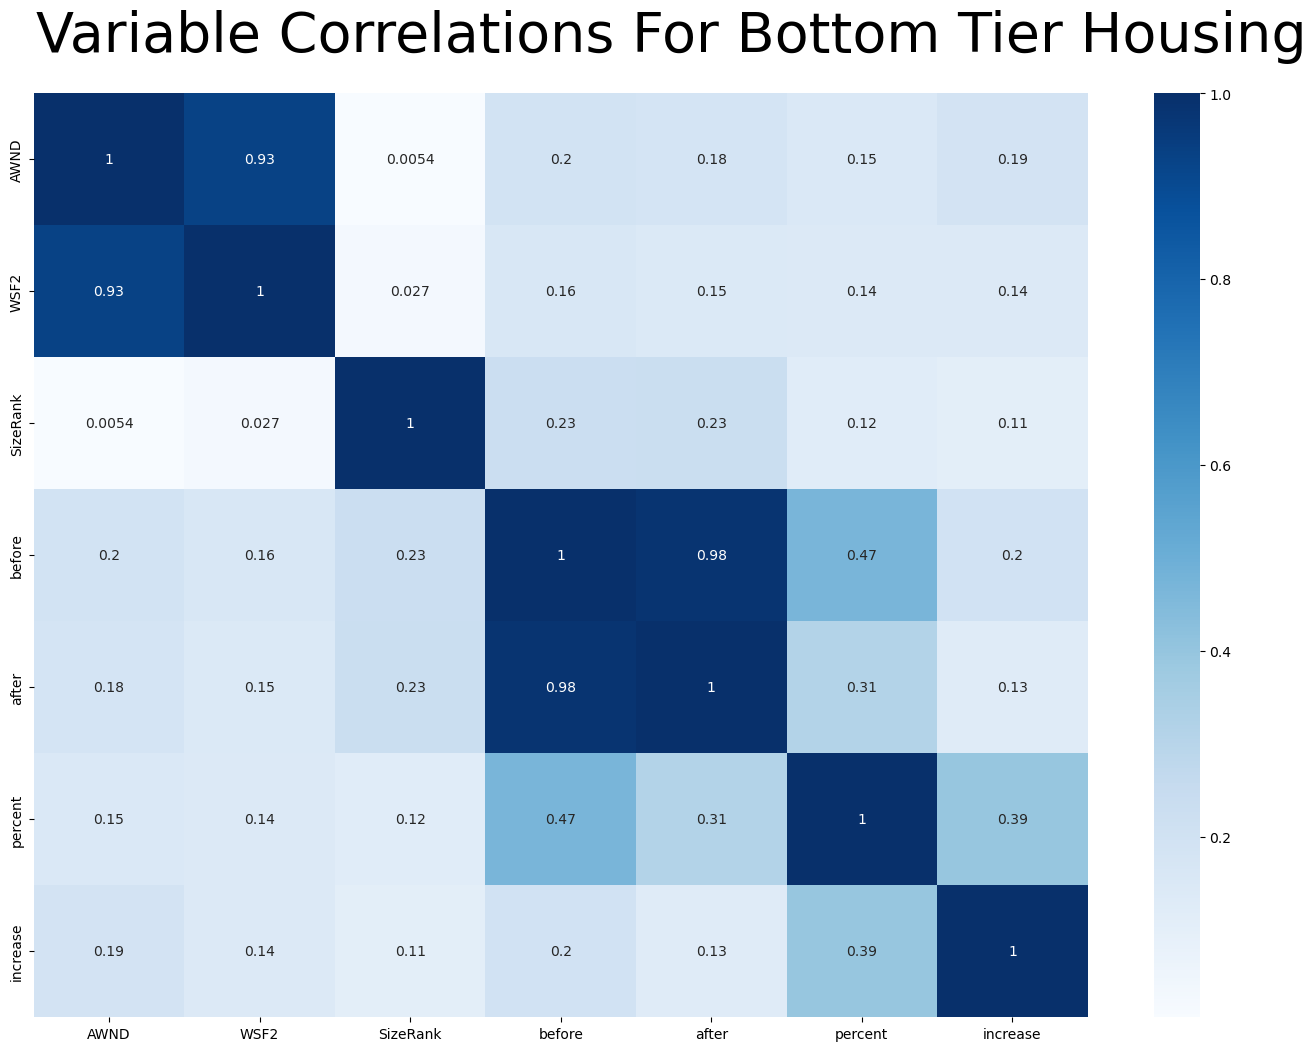

In [18]:
#checking variable correlations for bottom tier housing 
#high correlation between AWND and WSF2
#high crrelation between before and after
corr = bottom_hurricane.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations For Bottom Tier Housing', fontsize=40, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

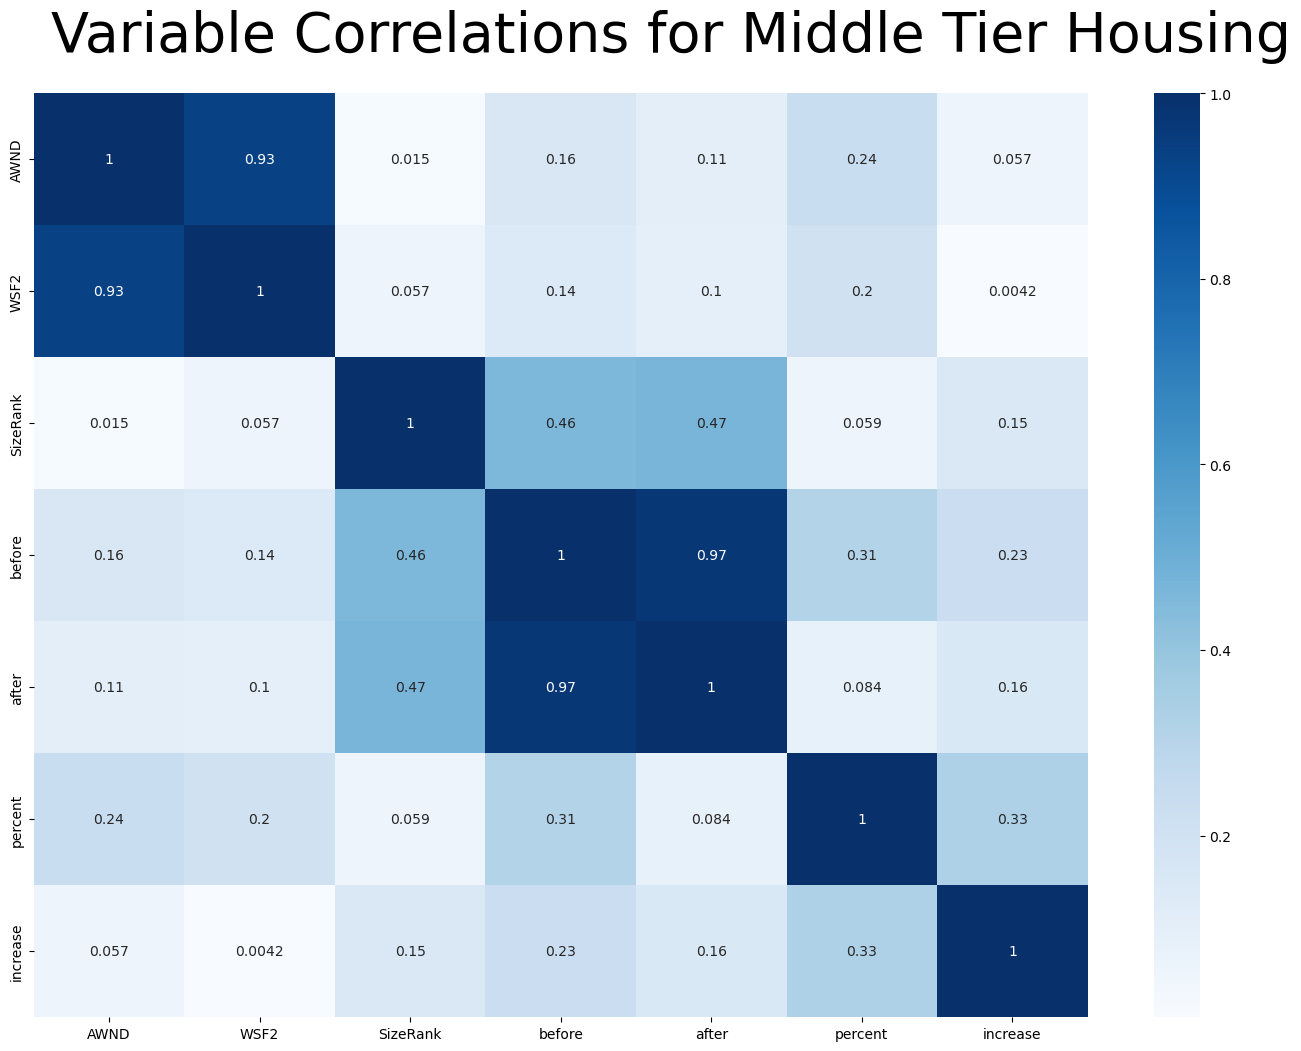

In [19]:
#checking variable correlations for middle tier housing 
#high correlation between AWND and WSF2
#high crrelation between before and after
corr = middle_hurricane.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations for Middle Tier Housing', fontsize=40, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

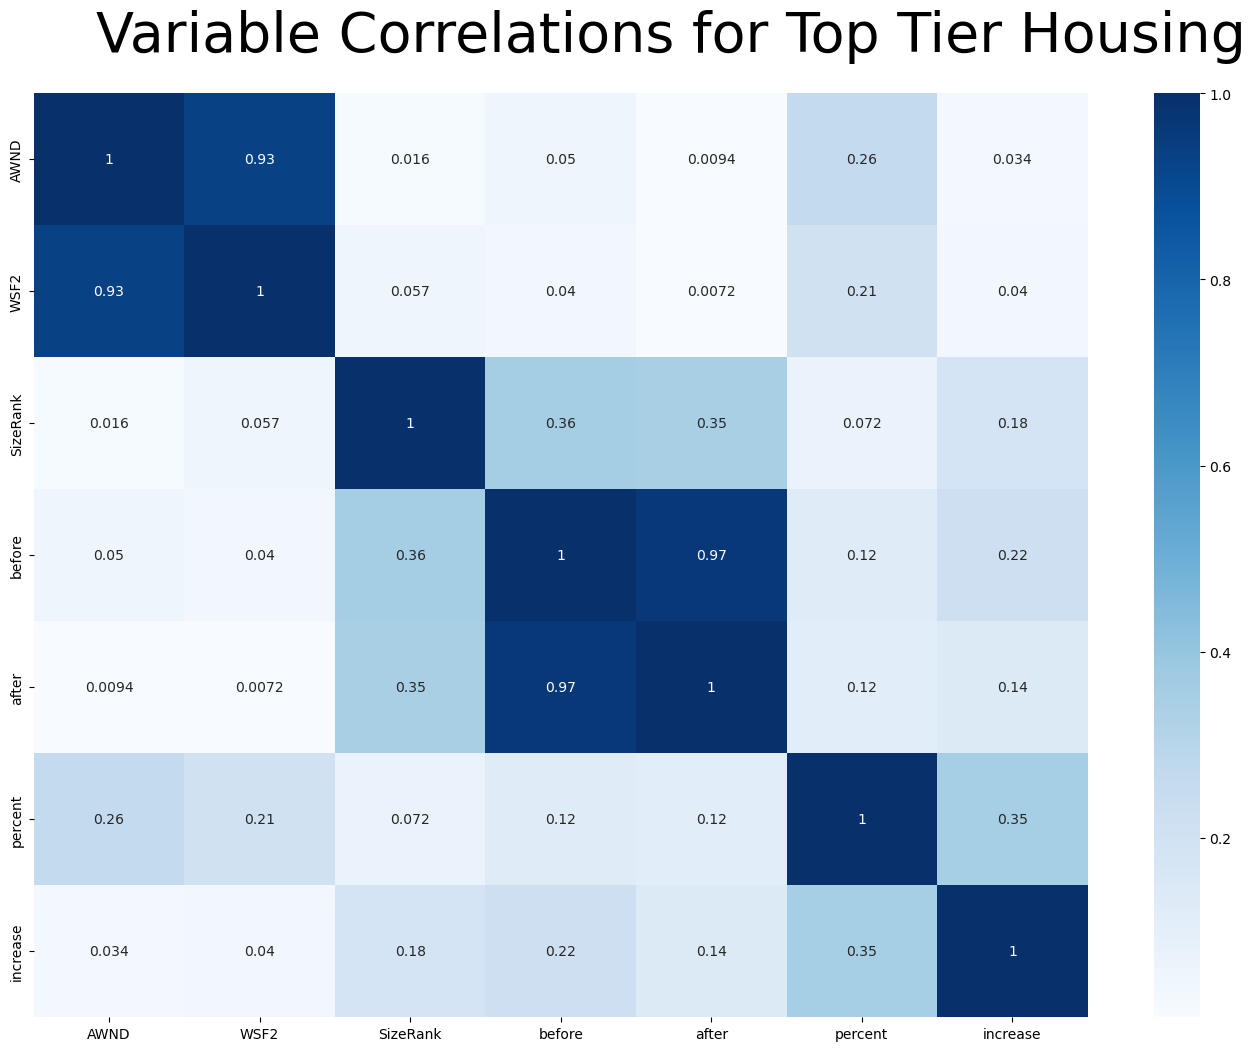

In [20]:
#checking variable correlations for top tier housing 
#high correlation between AWND and WSF2
#high crrelation between before and after
corr = top_hurricane.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations for Top Tier Housing', fontsize=40, y=.95, fontname='DejaVu Sans')
heatmap = sns.heatmap(corr, cmap='Blues', annot=True)

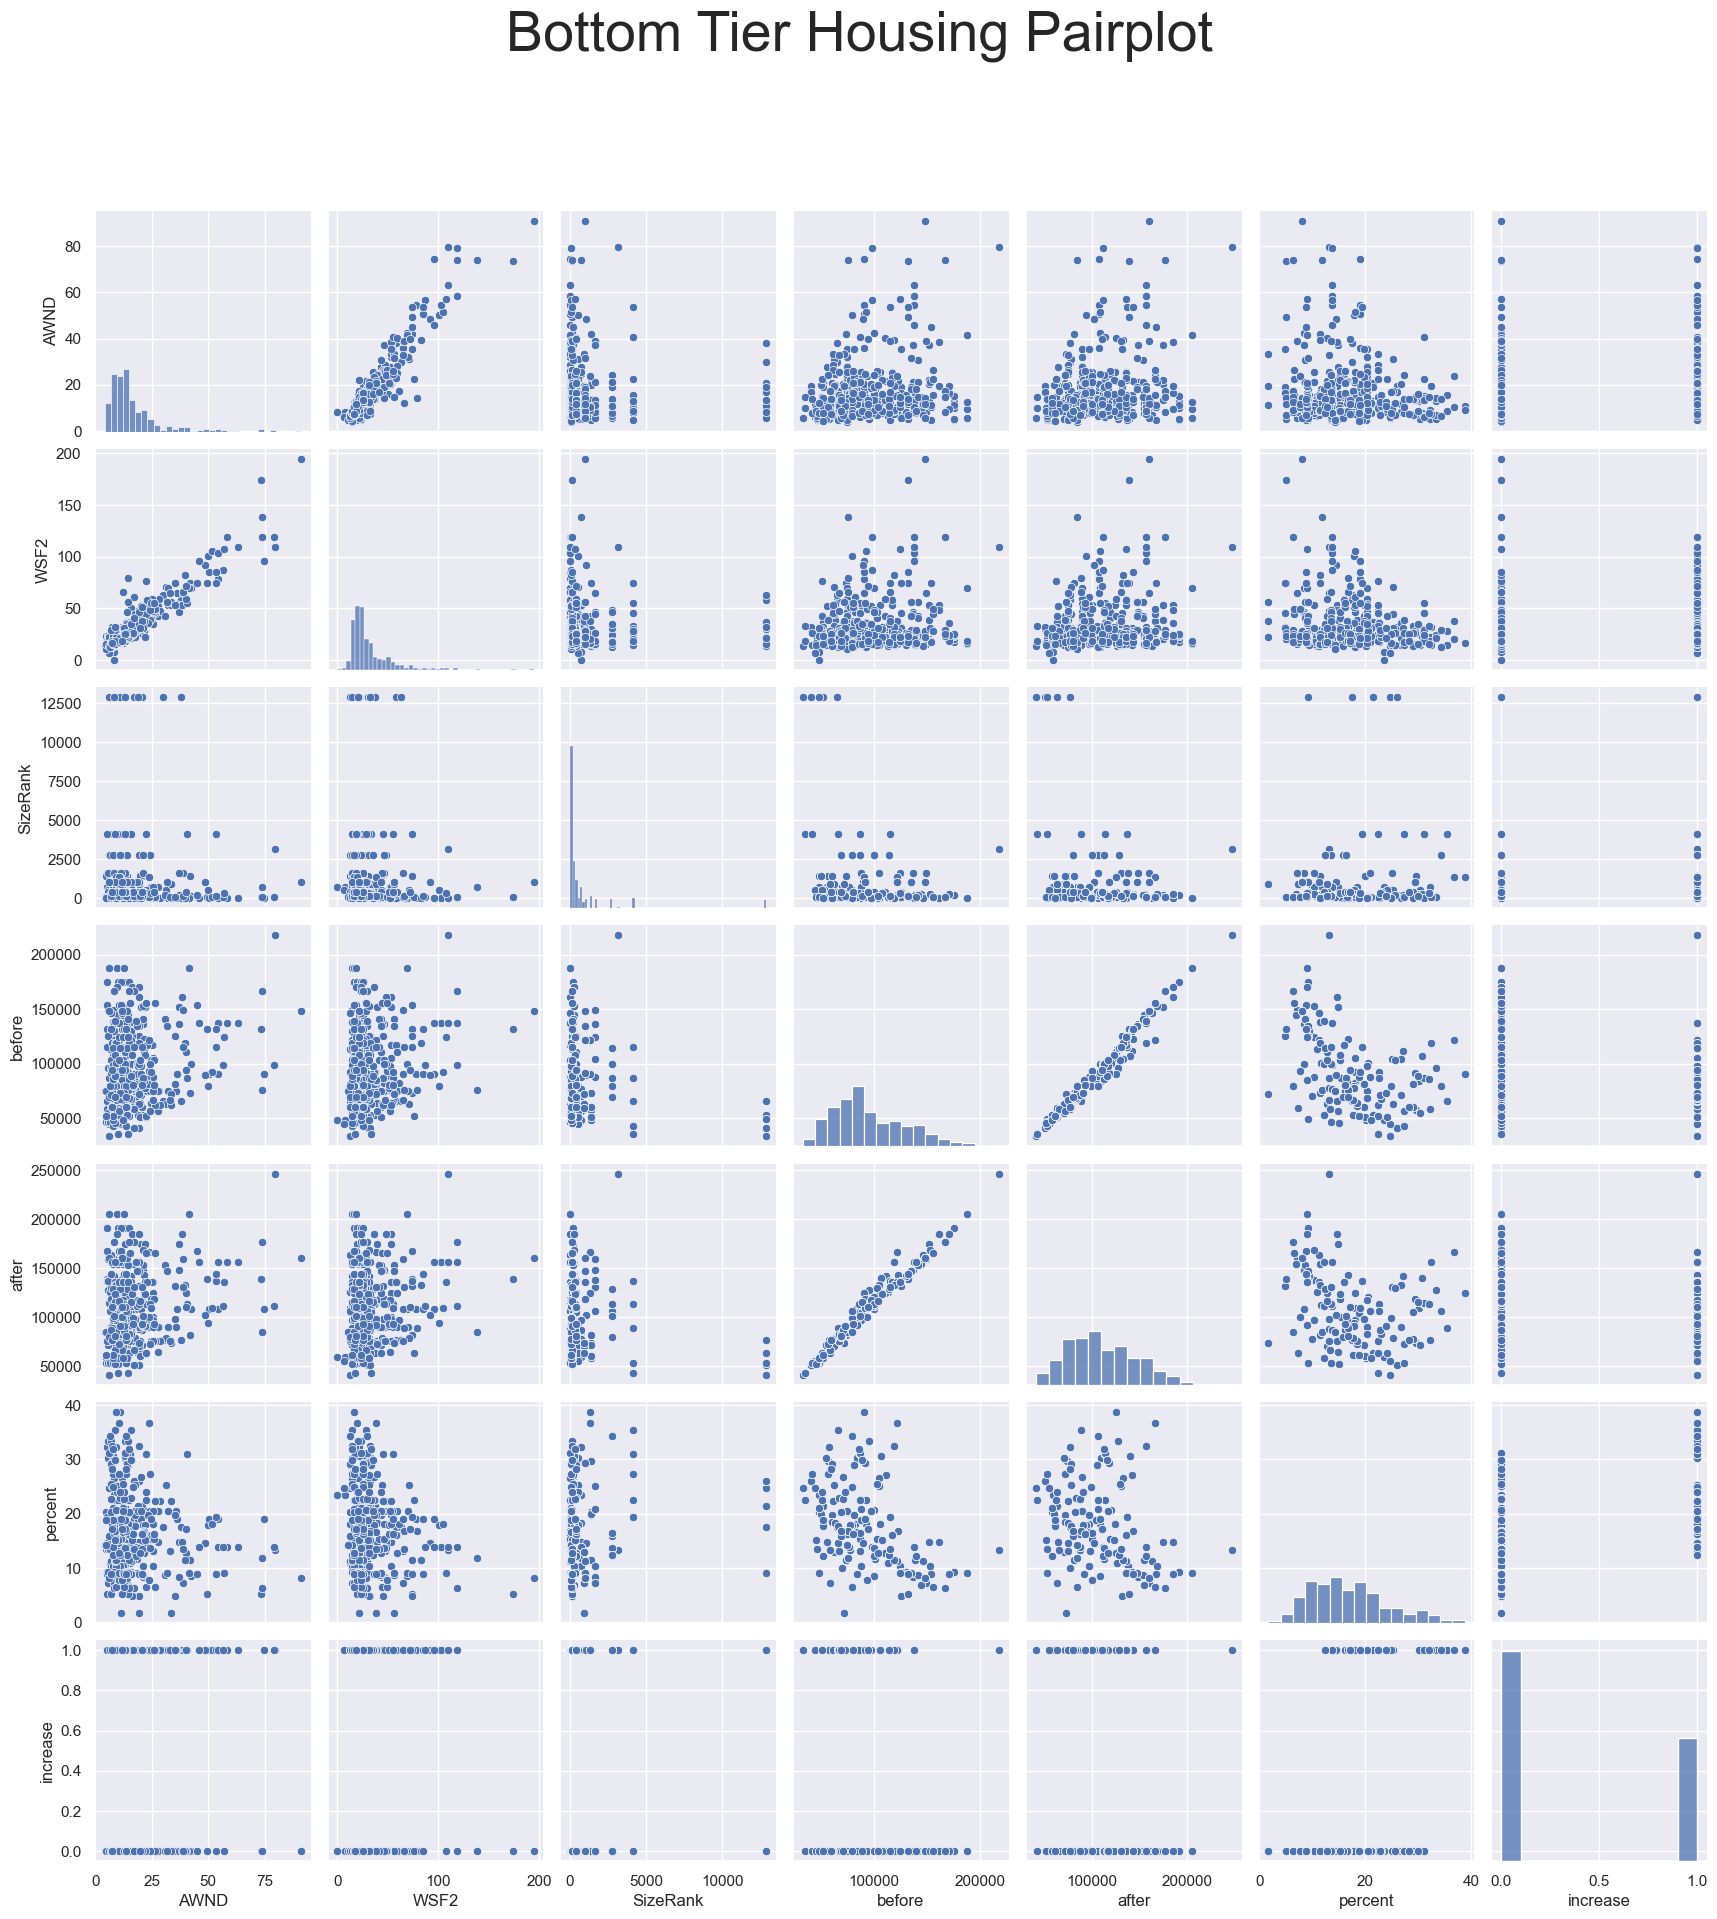

In [29]:
#plotting bottom_hurricane
#long tail on AWND and WSF2
sns.set()
s = sns.pairplot(bottom_hurricane, size = 2.5)
s.fig.suptitle("Bottom Tier Housing Pairplot", y= 1.1, fontsize=40)
plt.show();

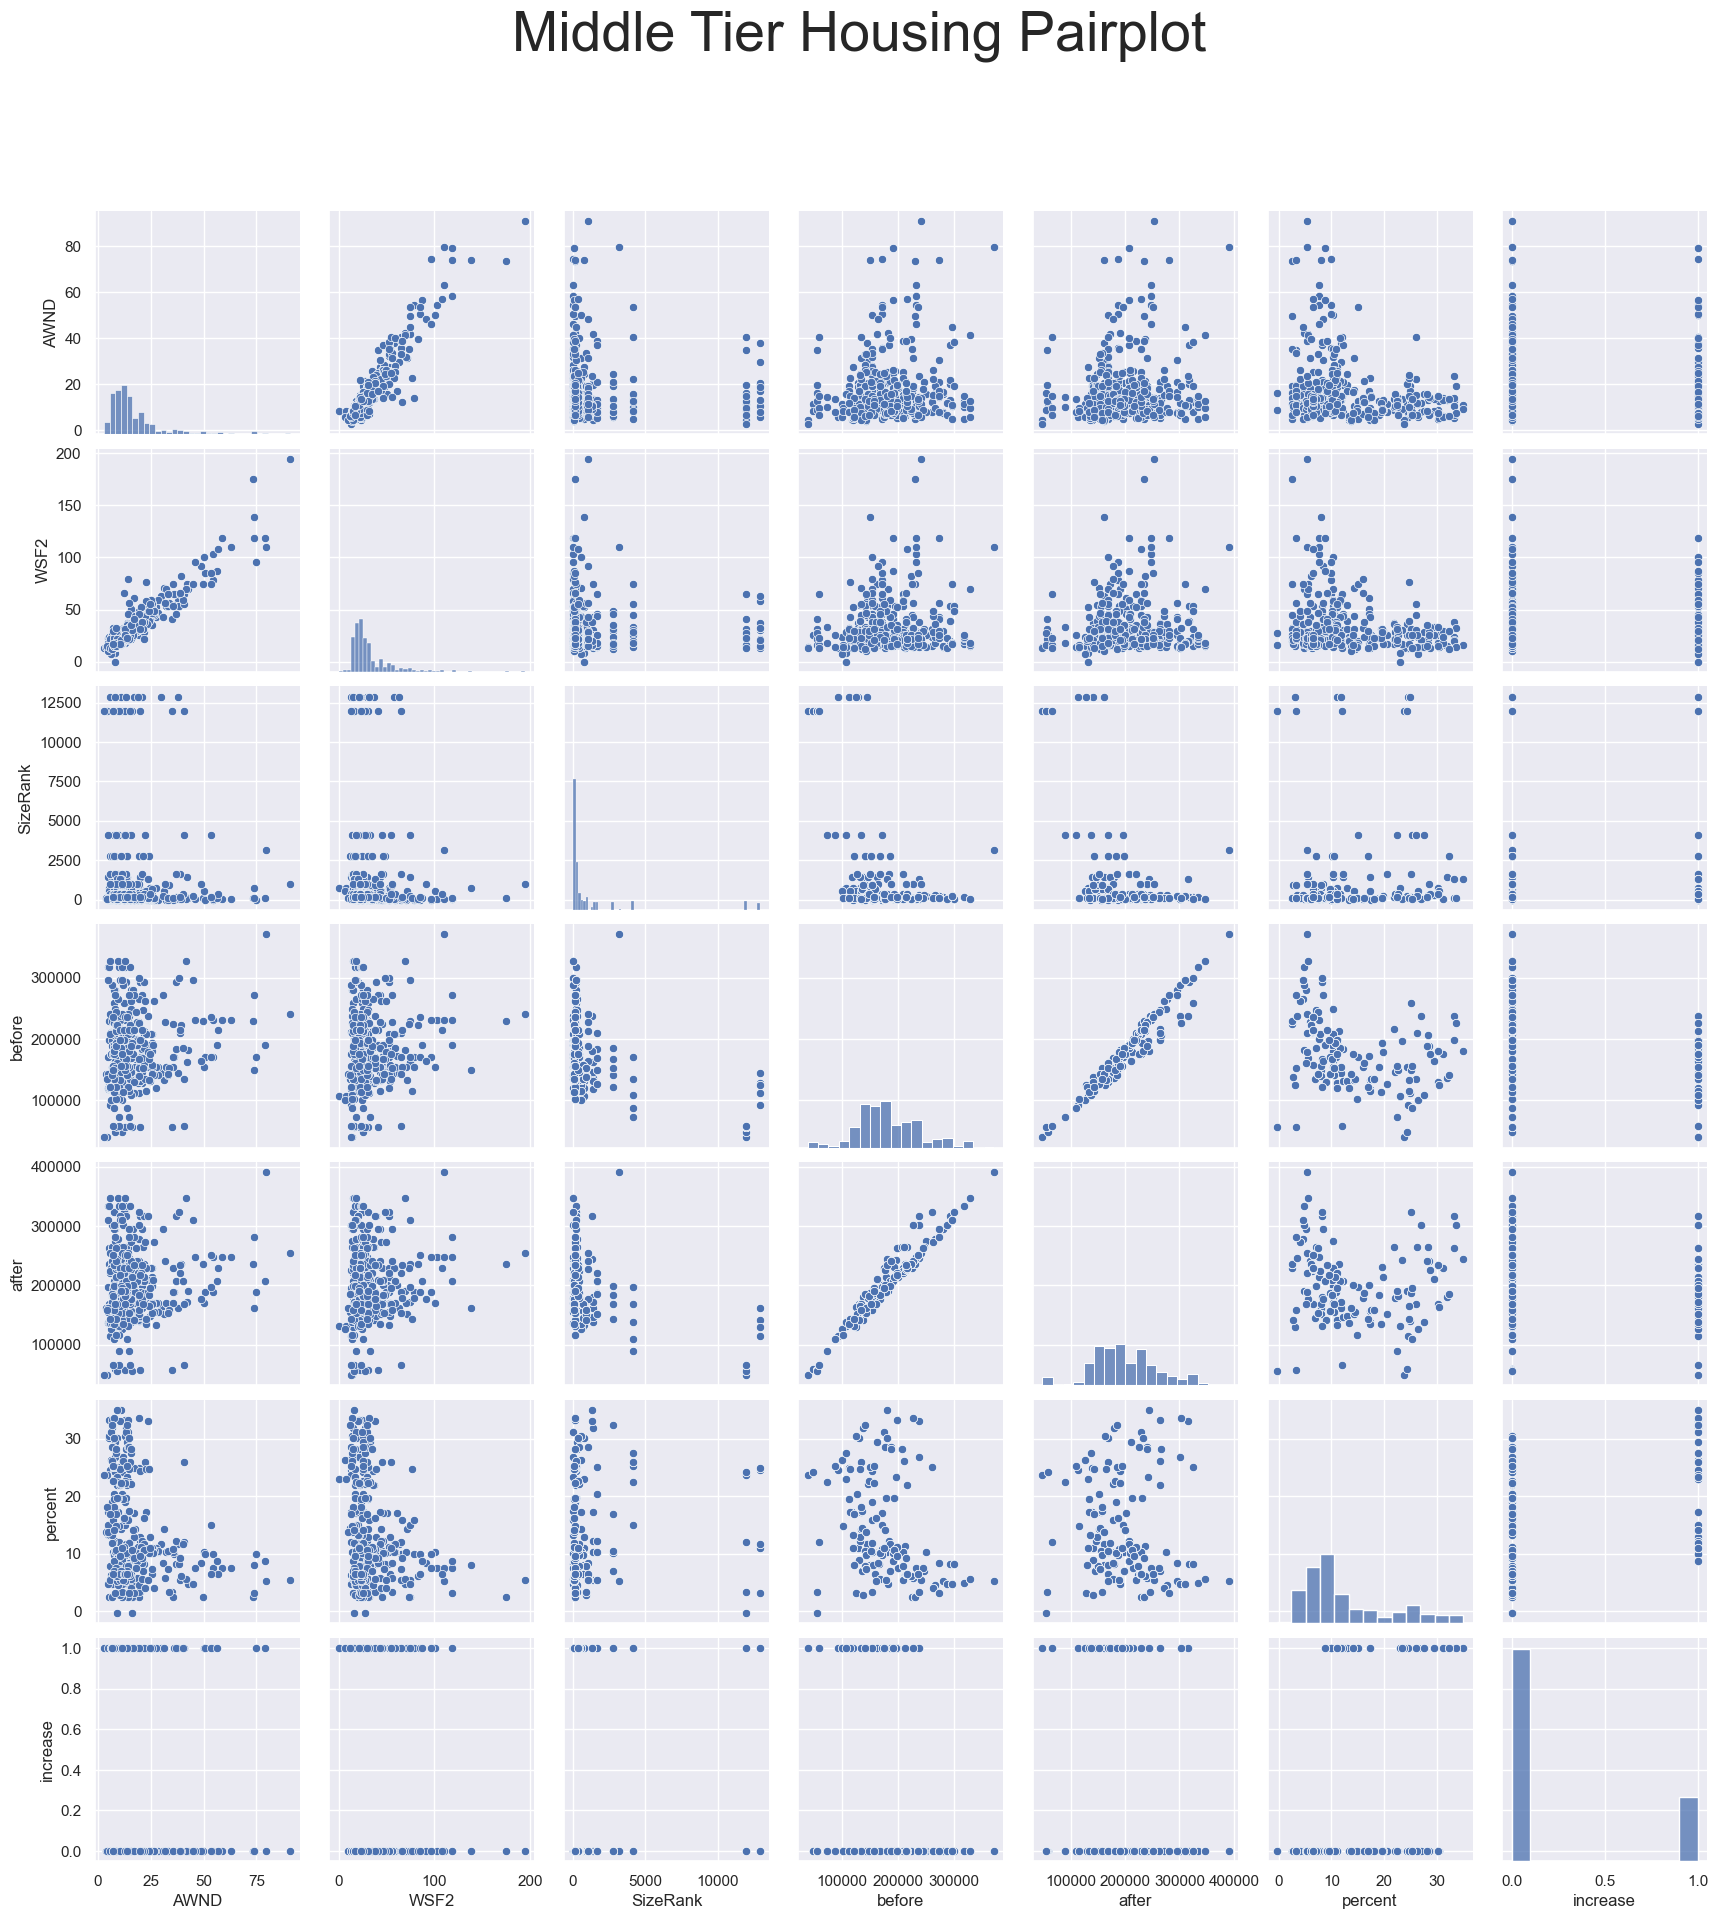

In [30]:
#plotting middle_hurricane
#long tail on AWND and WSF2
sns.set()
s = sns.pairplot(middle_hurricane, size = 2.5)
s.fig.suptitle("Middle Tier Housing Pairplot", y= 1.1, fontsize=40)
plt.show();

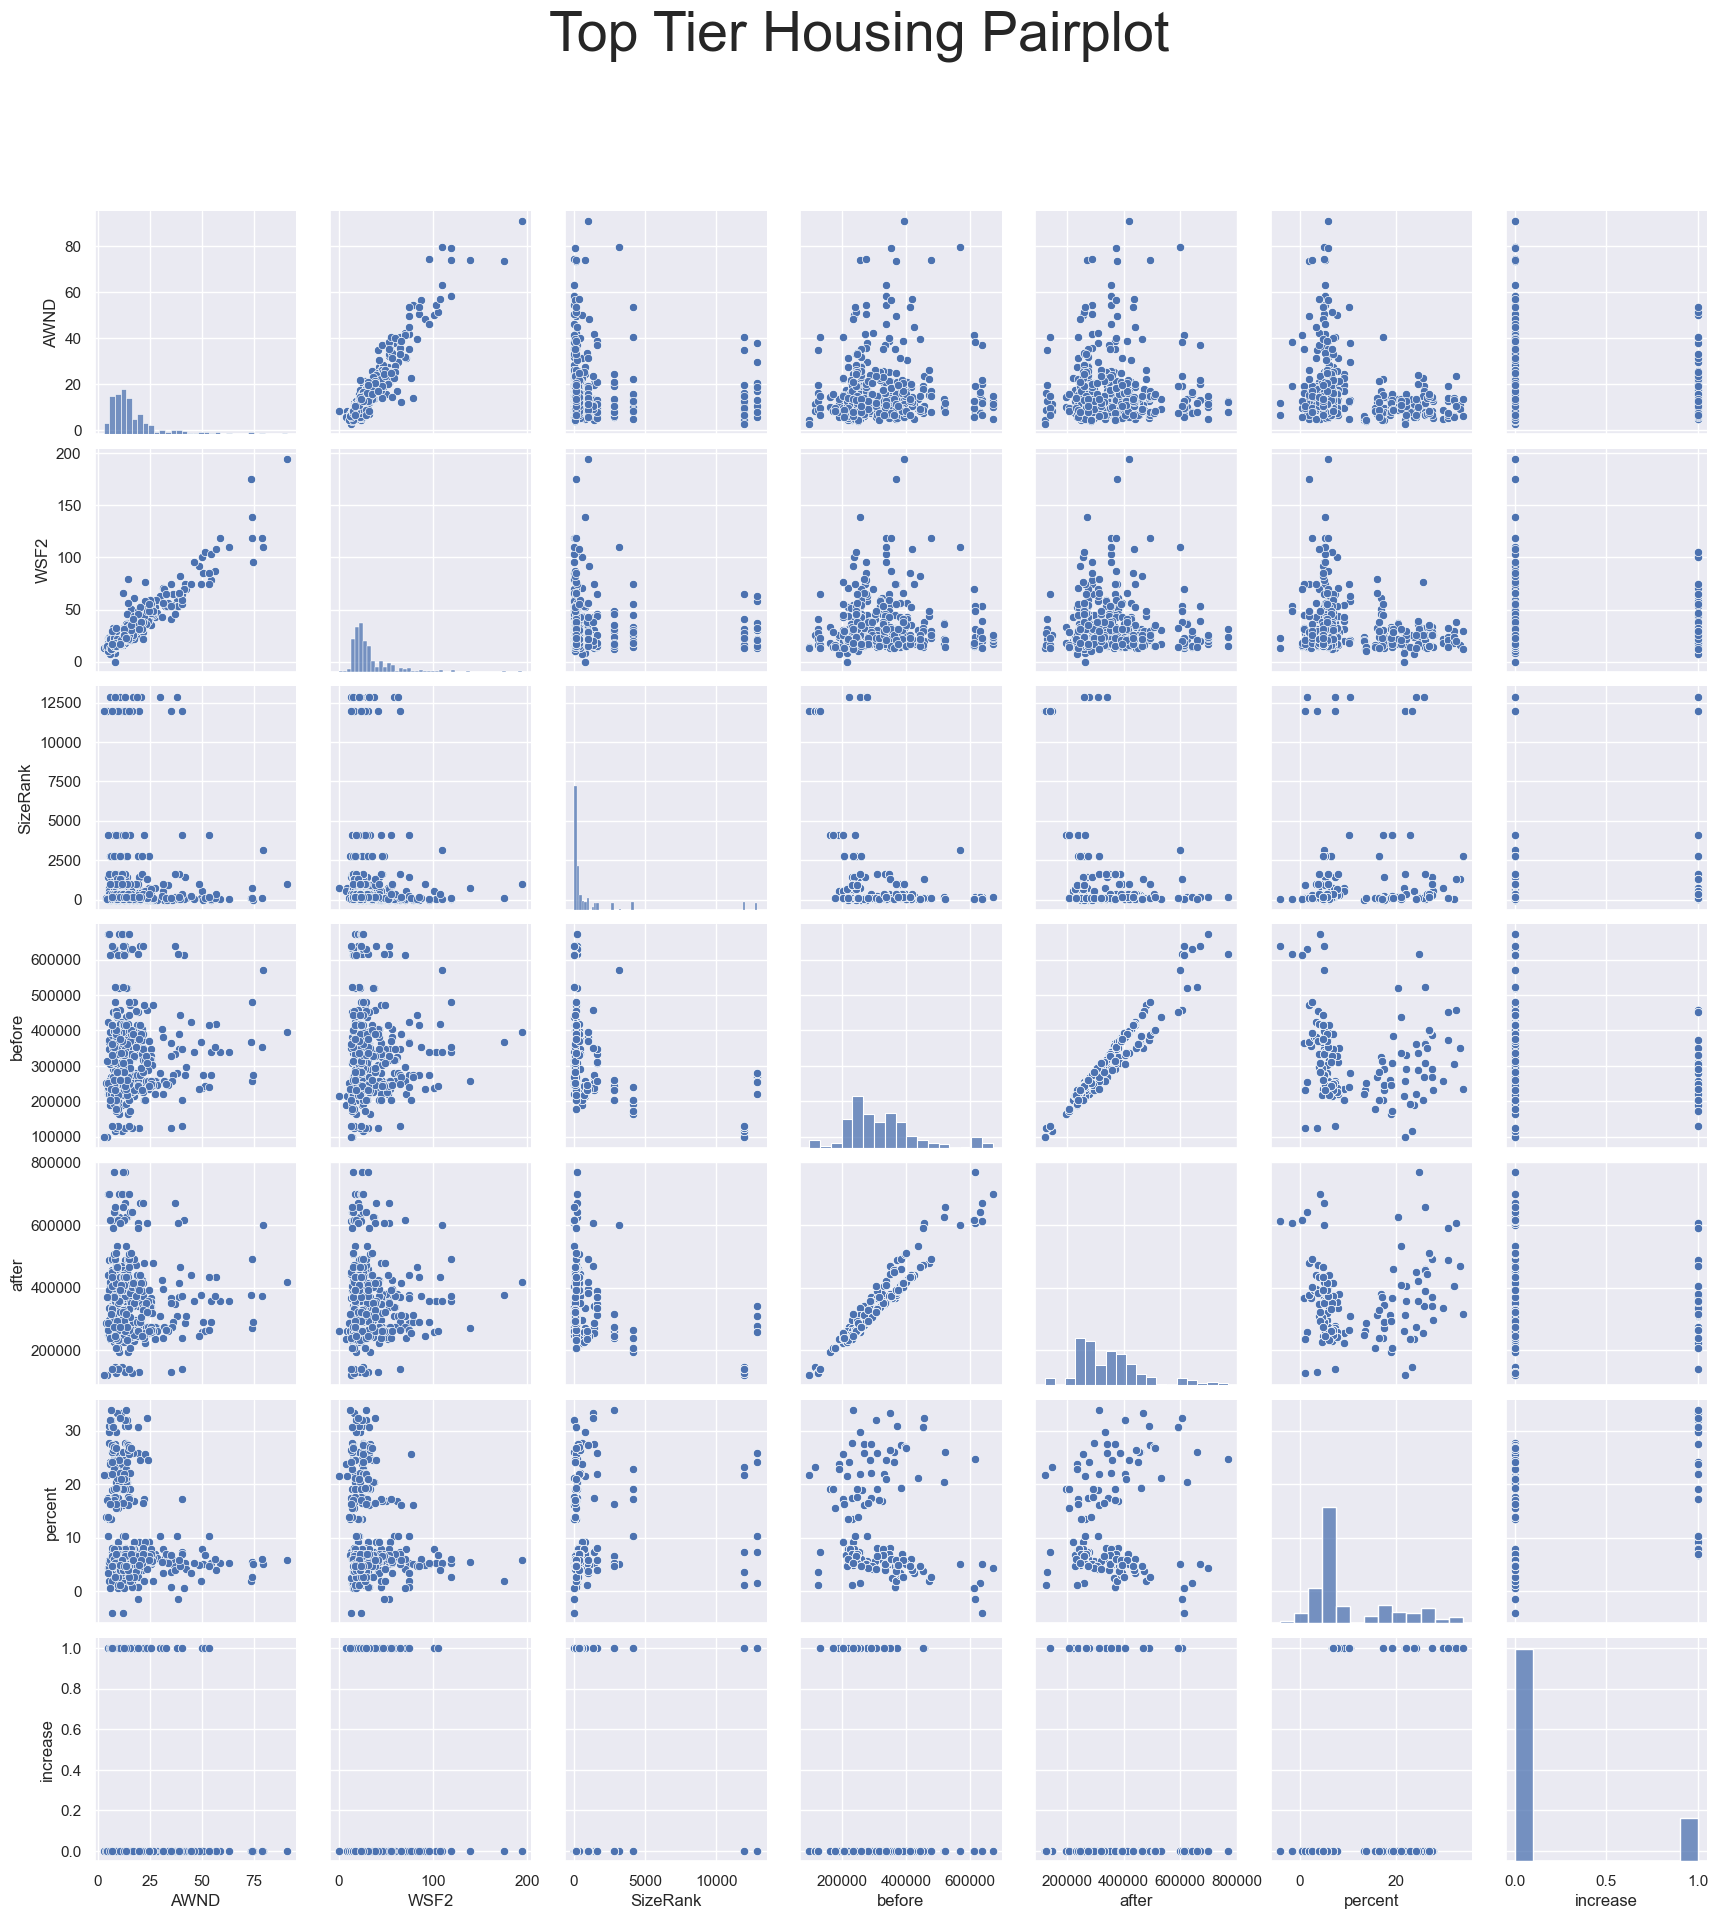

In [31]:
#plotting top_hurricane
#long tail on AWND and WSF2
sns.set()
s = sns.pairplot(top_hurricane, size = 2.5)
s.fig.suptitle("Top Tier Housing Pairplot", y= 1.1, fontsize=40)
plt.show();

### Saving the Datasets

In [24]:
#saving the dataframes
bottom_hurricane.to_csv(r'data\bottom_hurricane.csv', index=False)
middle_hurricane.to_csv(r'data\middle_hurricane.csv', index=False)
top_hurricane.to_csv(r'data\top_hurricane.csv', index=False)
all_hurricane.to_csv(r'data\all_hurricane.csv', index=False)